## Answer 1

In [1]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.pyplot import figure

In [2]:
def normalize(x):
    return x/((x.max()-x.min())*1.0)

In [3]:
def solve(images):
    for img in images:
        fig = plt.figure(figsize=(13,13));
        img = mpimg.imread(img)yo
        plt.imshow(img);
        
        x=np.matrix(np.arange(0,321,1))
        channel_4=np.repeat(x, 481, axis=0).T
        channel_4=np.expand_dims(channel_4, axis=2)
        feature=np.concatenate([img,channel_4],axis=-1)
        
        x=np.matrix(np.arange(0,481,1))
        channel_5=np.repeat(x, 321, axis=0)
        channel_5=np.expand_dims(channel_5, axis=2)
        feature=np.concatenate([feature,channel_5],axis=-1)
        feature=feature*1.0
        
        for channel in range(feature.shape[2]):
            feature[:,:,channel]=(normalize(feature[:,:,channel]))
            
        feature=feature.reshape((-1,5))
        feature.shape
        
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            kmeans = KMeans(n_clusters=clusters, random_state=0).fit(feature)
            bitmap=(kmeans.labels_.reshape(img.shape[0],img.shape[1]))
            plt.imshow(bitmap);
            plt.show()
            
            
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            gmm = GaussianMixture(n_components=clusters).fit(feature)
            labels = gmm.predict(feature)
            bitmap=(labels.reshape(img.shape[0],img.shape[1]))
            plt.imshow(bitmap);
            plt.show()

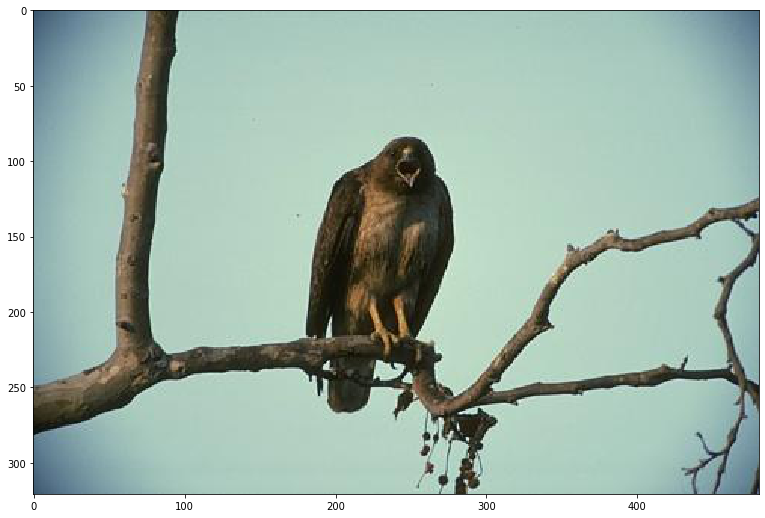

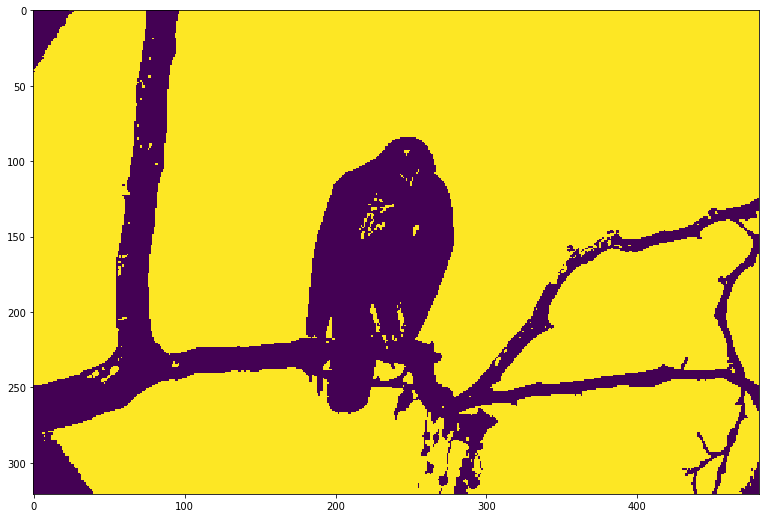

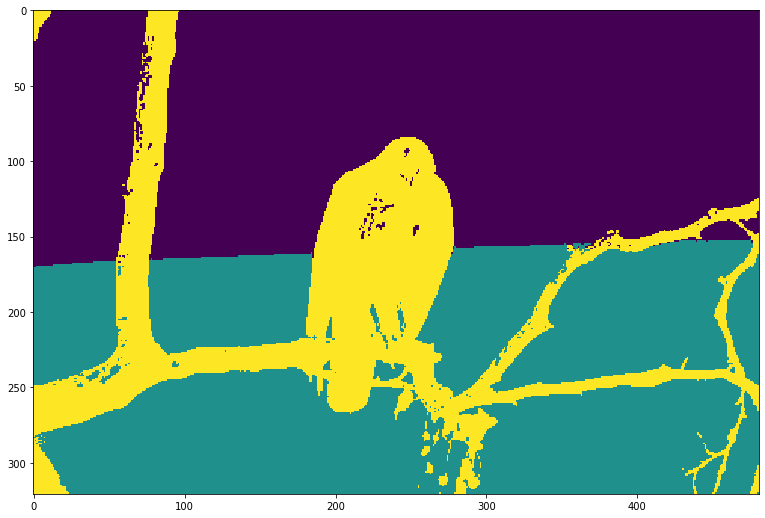

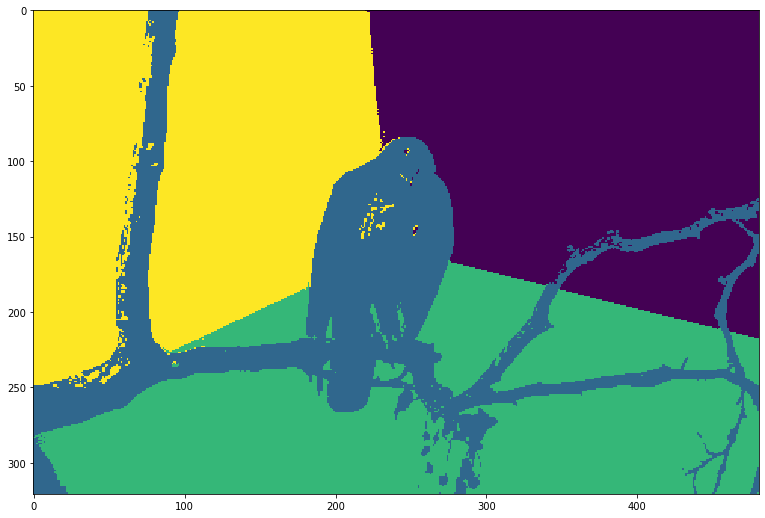

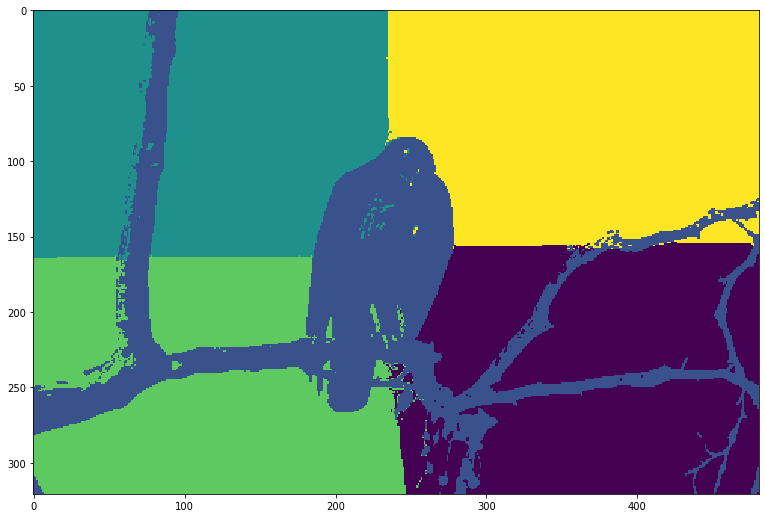

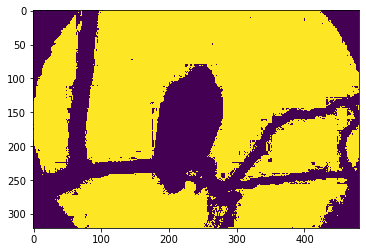

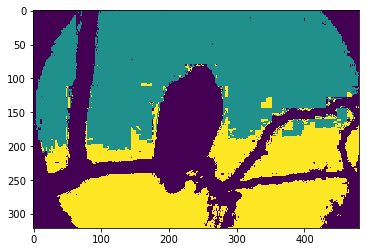

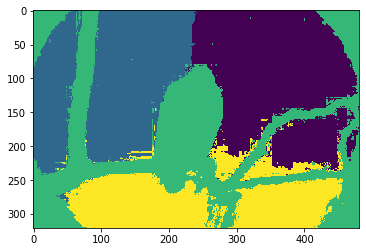

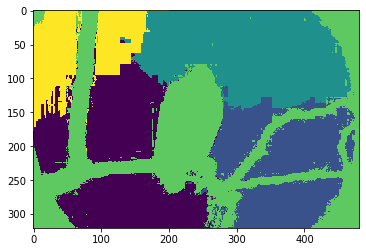

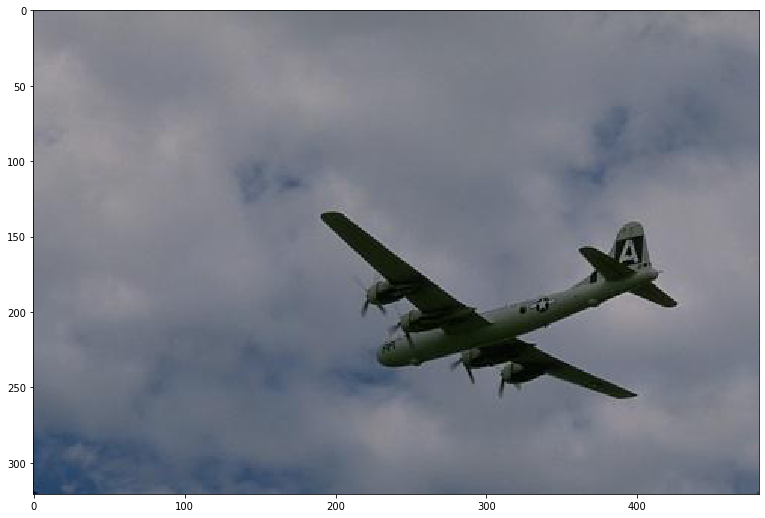

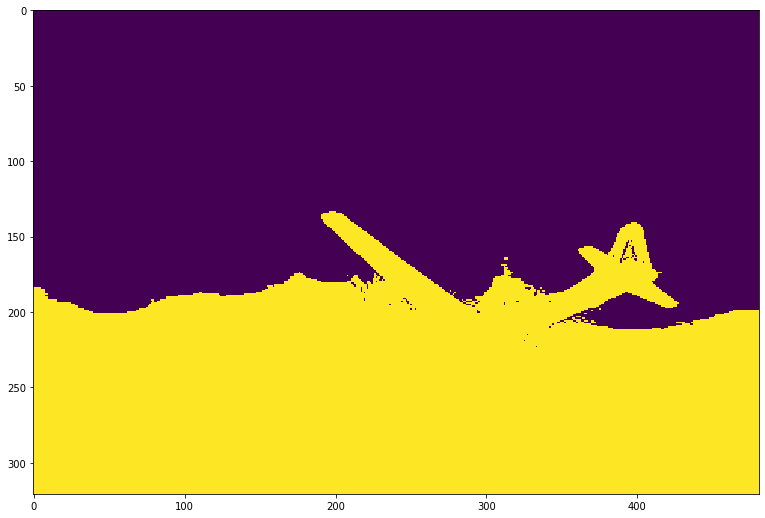

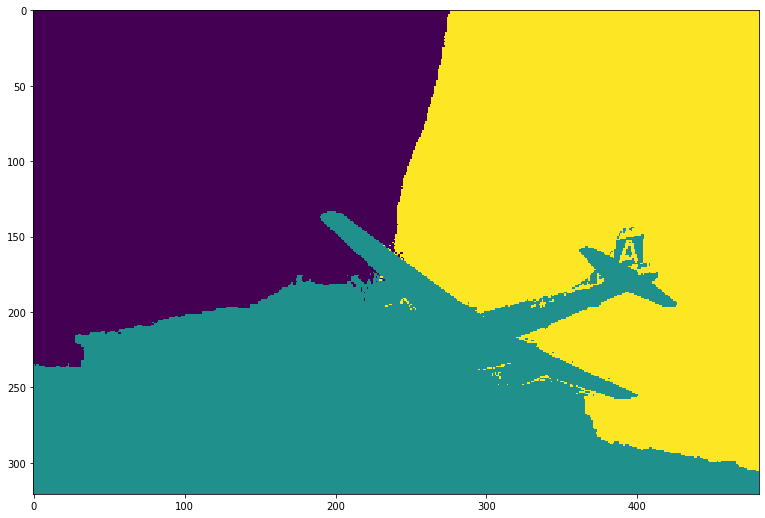

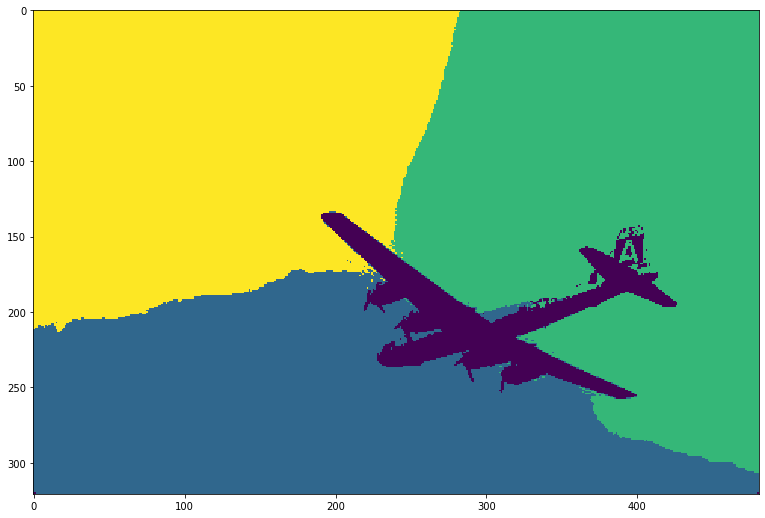

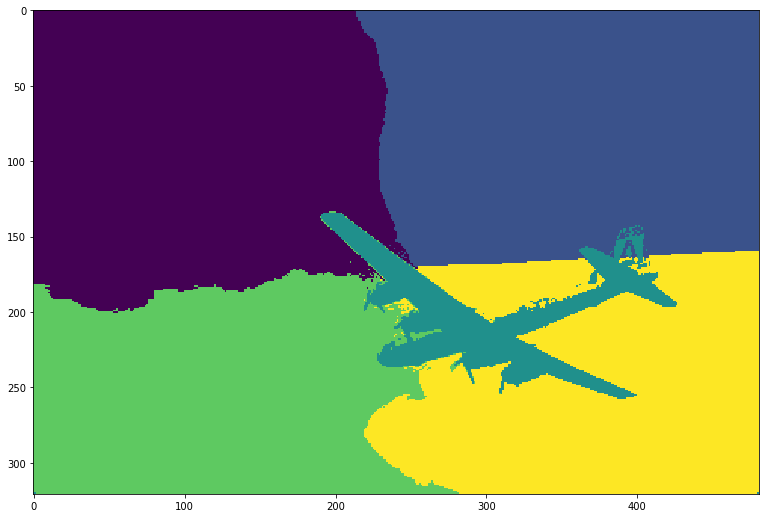

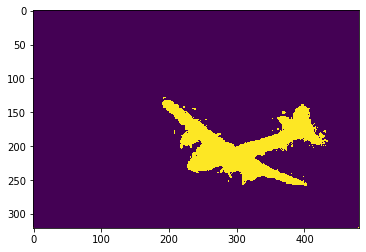

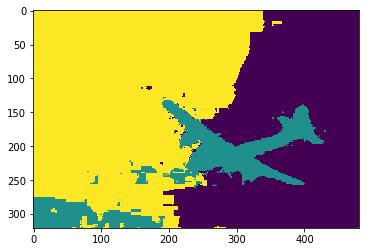

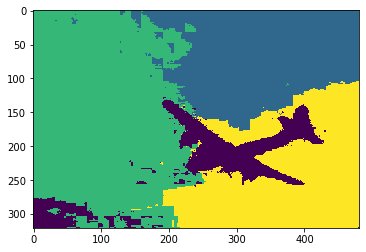

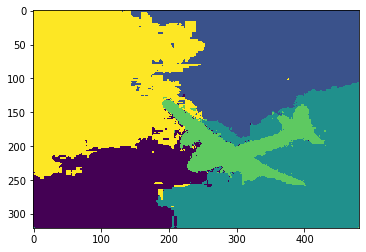

In [4]:
solve(['EECE5644_2019Fall_Homework4Questions_42049_colorBird.jpg','EECE5644_2019Fall_Homework4Questions_3096_colorPlane.jpg'])

## Answer 2

In [66]:
def sample_class2():
    rad=np.random.uniform(2,3)
    theta=np.random.uniform(-np.pi,np.pi)
    return np.matrix([rad*np.cos(theta),rad*np.sin(theta)])

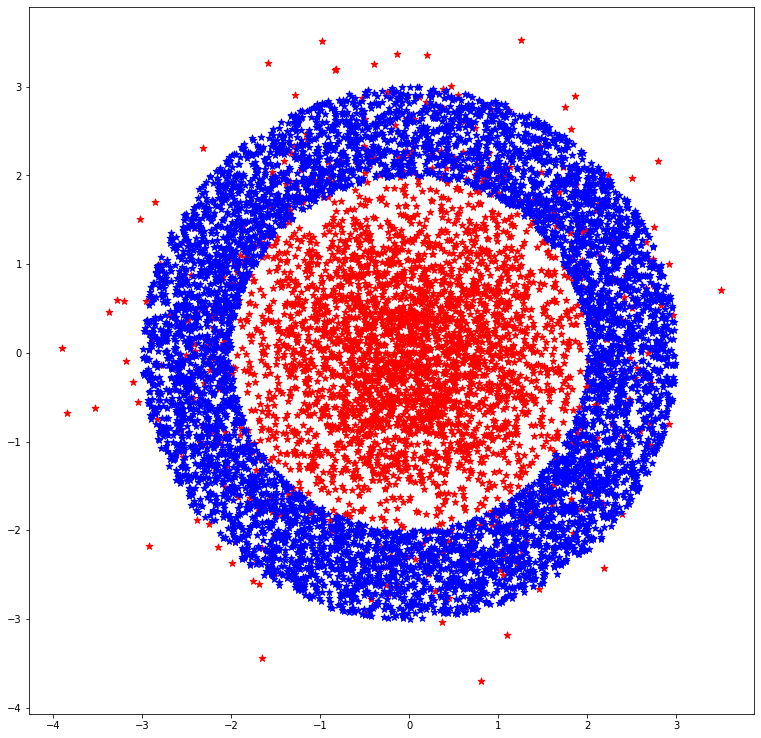

In [78]:
fig = plt.figure(figsize=(13,13));
prior=0.35
zero_mean=[0,0]
cov=[[1,0],[0,1]]
samples_class1=[]
samples_class2=[]
for num in range(10000):    
    uniform_sample=np.random.uniform()
    if uniform_sample<prior:
        sample=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()
        samples_class1.append(sample)
    else:
        sample=sample_class2().T
        samples_class2.append(sample)
samples_class1=np.hstack(samples_class1)
samples_class2=np.hstack(samples_class2)

a=np.squeeze(np.asarray(samples_class1.transpose()[:,1]))
b=np.squeeze(np.asarray(samples_class1.transpose()[:,0]))

c=np.squeeze(np.asarray(samples_class2.transpose()[:,1])) 
d=np.squeeze(np.asarray(samples_class2.transpose()[:,0]))

plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
plt.scatter(d,c,color='b',marker='*',label='class 1',s=50)